# Query Metric Analysis

In [1]:
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from fainder.utils import load_input, configure_run
from utils.plotting_defaults import set_style

set_style()
configure_run("WARNING")
Path("plots/query_metrics").mkdir(parents=True, exist_ok=True)

In [2]:
try:
    shutil.rmtree(Path.home() / ".cache" / "matplotlib" / "tex.cache")
except FileNotFoundError:
    pass

In [3]:
for i, dataset in enumerate(["sportstables", "open_data_usa", "gittables"]):
    selectivity, cluster_hits, bin_edge_matches = load_input(
        f"../data/{dataset}/queries/accuracy_benchmark/all-metrics.zst"
    )
    metrics = pd.DataFrame(
        {
            "QS": selectivity,
            "SC": cluster_hits,
            "BE": bin_edge_matches,
        }
    )

    fig, ax = plt.subplots(figsize=(1.25, 1.1))

    sns.violinplot(data=metrics, ax=ax, cut=0)
    ax.set_ylim(0, 1)
    ax.set_ylabel(r"Score")
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.tight_layout(pad=1.02)
    plt.savefig(f"plots/query_metrics/{dataset}.pdf", bbox_inches="tight", pad_inches=0.01)
    plt.close()

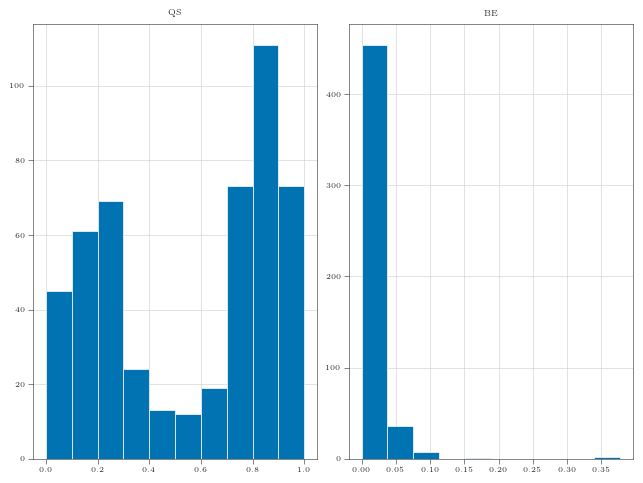

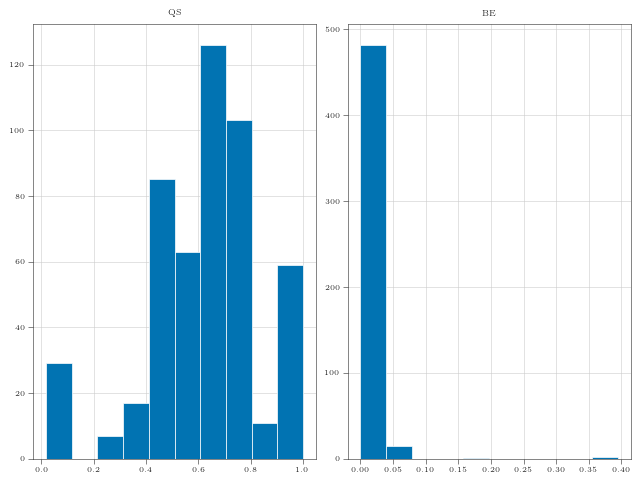

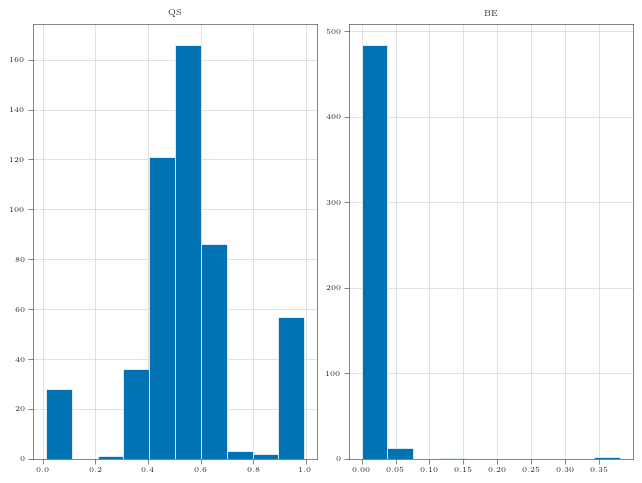

In [4]:
for i, dataset in enumerate(["sportstables", "open_data_usa", "gittables"]):
    selectivity, cluster_hits, bin_edge_matches = load_input(
        f"../data/{dataset}/queries/llm/all-metrics.zst"
    )
    metrics = pd.DataFrame(
        {
            "QS": selectivity,
            "SC": cluster_hits,
            "BE": bin_edge_matches,
        }
    )

    metrics.hist()

    plt.tight_layout(pad=1.02)
    plt.show()
    plt.close()